# Title of the Analysis

**Authors:** 

## Overview

This is where an overview of the problem statement and a breif description of the analysis would go.

## Business Problem

Explain the business problem and include relevant sources to fully describe what the problem is, how it can be solved using models, and what is trying to be determined by the models. include background on the issue and related studies.

## Data Understanding

Describe where the data came from and how it relates to the business problem above. Give links to the data, a table with the relevant features and descriptions and links to other studies that give more information on the data set itself.

### Importing Packages and Loading the Datasets

In [385]:
#Import standard packages for data engineering and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import date, datetime

#import packages to support geo visuals
import folium
from folium.plugins import HeatMap
import json

#Import packages to perform linear regression modeling and preprocessing tools
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.formula.api import ols

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, PolynomialFeatures, StandardScaler
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, plot_roc_curve, classification_report, plot_confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#Import local functions from src/
import sys
sys.path.insert(0, 'src/')

#Ignore warnings in cells
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [386]:
# Import all related data sets

X = pd.read_csv('data/water_well_training_values.csv')
y = pd.read_csv('data/water_well_training_labels.csv')
df = pd.merge(y,X)

In [387]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   status_group           59400 non-null  object 
 2   amount_tsh             59400 non-null  float64
 3   date_recorded          59400 non-null  object 
 4   funder                 55765 non-null  object 
 5   gps_height             59400 non-null  int64  
 6   installer              55745 non-null  object 
 7   longitude              59400 non-null  float64
 8   latitude               59400 non-null  float64
 9   wpt_name               59400 non-null  object 
 10  num_private            59400 non-null  int64  
 11  basin                  59400 non-null  object 
 12  subvillage             59029 non-null  object 
 13  region                 59400 non-null  object 
 14  region_code            59400 non-null  int64  
 15  di

### Get an understanding of the data

Thurough description of the key features, data types, possible problems that need to be solved with cleaning and some suggestions of feature engineering.

## Data Preparation

In [388]:
#check for duplicates in the data
df[df.duplicated()]

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group


We found no duplicate rows.

### Dealing with missing values 

In [389]:
# drop id column
df.drop('id',axis=1,inplace=True)

In [390]:
# Confirm the columns with missing values
df.isna().sum()

status_group                 0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [391]:
# Fill NaN values according to appropriate method
df['funder'].value_counts()

Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
                          ... 
Songa Hospi                  1
Robert Mosi                  1
Staford Higima               1
Kwa Ditriki Cho              1
Sharifa Athuman              1
Name: funder, Length: 1897, dtype: int64

In [392]:
df['funder'].fillna(value='missing',inplace =True)

In [393]:
df['funder'].isna().sum()

0

In [394]:
df['installer'].value_counts()

DWE                        17402
Government                  1825
RWE                         1206
Commu                       1060
DANIDA                      1050
                           ...  
CHINA HENAN CONSTUCTION        1
Robert Mosi                    1
AQUA BLUES ANGELS              1
mwita                          1
Robert kampala                 1
Name: installer, Length: 2145, dtype: int64

In [395]:
df['installer'].fillna(value='missing',inplace=True)

In [396]:
df['subvillage'].value_counts()

Madukani      508
Shuleni       506
Majengo       502
Kati          373
Mtakuja       262
             ... 
Kipandeni       1
Nyamande B      1
Masaladi        1
Ingwagwele      1
Kiguruka        1
Name: subvillage, Length: 19287, dtype: int64

In [397]:
df['subvillage'].fillna(value='none',inplace=True)

In [398]:
df['public_meeting'].value_counts()

True     51011
False     5055
Name: public_meeting, dtype: int64

In [399]:
df['public_meeting'].fillna(value=False,inplace=True)

In [400]:
df['public_meeting'].value_counts()

True     51011
False     8389
Name: public_meeting, dtype: int64

In [401]:
df['scheme_management'].value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [402]:
df['scheme_management'].fillna(value='None',inplace=True)

In [403]:
df['scheme_name'].value_counts()

K                         682
None                      644
Borehole                  546
Chalinze wate             405
M                         400
                         ... 
New keni Awater supply      1
Kipatimu water supply       1
Solo                        1
Oljoro water pipelines      1
Ikola water suply           1
Name: scheme_name, Length: 2696, dtype: int64

In [404]:
df.drop('scheme_name',axis=1,inplace=True)

In [405]:
df['permit'].value_counts()

True     38852
False    17492
Name: permit, dtype: int64

In [406]:
df['permit'].fillna(value=False,inplace=True)

In [407]:
df.isna().sum()

status_group             0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
source_class             0
w

Explanation of why NaN values were filled using specific method

In [408]:
X_clean = df.drop('status_group',axis=1)

In [409]:
X_clean.isna().sum()

amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
source_class             0
waterpoint_type          0
w

### Converting Data Types

In [410]:
# Convert binary data to int type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   status_group           59400 non-null  object 
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 59400 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              59400 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59400 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

- date_recorded: object to datetime
- num_private: unkown feature
- 

In [411]:
# Drop uneccesary columns
df['extraction_type'].value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [412]:
df['extraction_type_class'].value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

In [413]:
df['extraction_type_group'].value_counts()

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

We will not be using the ID column in exploratory analysis or modeling.

#### Dealing with outliers

In [414]:
# Check for outliers
df.describe()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [415]:
df['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [416]:
stat_map = {'functional':2,'functional needs repair':1,'non functional':0}
df['status_group'] = df['status_group'].map(stat_map)


In [417]:
df['status_group'].value_counts()

2    32259
0    22824
1     4317
Name: status_group, dtype: int64

Explanation of outliers, what makes them outliers and why they were dropped from the data. 

# Feature Engineering

Describe some features that could be engineered from the data and discuss which engineered features would be used in what models.

In [418]:
# cutting down on unique value types in the data
cat = X_clean.select_dtypes('object')

In [419]:
cols = cat.columns
X_clean[cols] = X_clean[cols].where(X_clean[cols].apply(lambda x: x.map(x.value_counts())) >= 50, 'other')

In [420]:
X_clean.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,other,Iringa,11,5,Ludewa,other,109,True,GeoData Consultants Ltd,VWC,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,0.0,2013-03-06,Grumeti,1399,other,34.698766,-2.147466,Zahanati,0,Lake Victoria,other,Mara,20,2,Serengeti,Natta,280,False,GeoData Consultants Ltd,Other,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,25.0,2013-02-25,other,686,World vision,37.460664,-3.821329,other,0,Pangani,Majengo,Manyara,21,4,Simanjiro,other,250,True,GeoData Consultants Ltd,VWC,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,other,0,Ruvuma / Southern Coast,other,Mtwara,90,63,Nanyumbu,other,58,True,GeoData Consultants Ltd,VWC,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,0.0,2011-07-13,other,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,other,Kagera,18,1,Karagwe,other,0,True,GeoData Consultants Ltd,None,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [421]:
X_clean.drop(['date_recorded'], axis = 1, inplace = True)

In [422]:
# drop datapoints with 0 longitude
X_clean = X_clean[X_clean['longitude'].notna()]
X_clean.head()

,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,6000.0,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,other,Iringa,11,5,Ludewa,other,109,True,GeoData Consultants Ltd,VWC,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,0.0,Grumeti,1399,other,34.698766,-2.147466,Zahanati,0,Lake Victoria,other,Mara,20,2,Serengeti,Natta,280,False,GeoData Consultants Ltd,Other,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,25.0,other,686,World vision,37.460664,-3.821329,other,0,Pangani,Majengo,Manyara,21,4,Simanjiro,other,250,True,GeoData Consultants Ltd,VWC,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,0.0,Unicef,263,UNICEF,38.486161,-11.155298,other,0,Ruvuma / Southern Coast,other,Mtwara,90,63,Nanyumbu,other,58,True,GeoData Consultants Ltd,VWC,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,0.0,other,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,other,Kagera,18,1,Karagwe,other,0,True,GeoData Consultants Ltd,None,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [423]:
# Build functions here to .map to the data set, creating new columns with features
for i in X_clean.columns:
    print('{}: {}'.format(i,len(df[i].value_counts())))

amount_tsh: 98
funder: 1898
gps_height: 2428
installer: 2146
longitude: 57516
latitude: 57517
wpt_name: 37400
num_private: 65
basin: 9
subvillage: 19288
region: 21
region_code: 27
district_code: 20
lga: 125
ward: 2092
population: 1049
public_meeting: 2
recorded_by: 1
scheme_management: 12
permit: 2
construction_year: 55
extraction_type: 18
extraction_type_group: 13
extraction_type_class: 7
management: 12
management_group: 5
payment: 7
payment_type: 7
water_quality: 8
quality_group: 6
quantity: 5
quantity_group: 5
source: 10
source_type: 7
source_class: 3
waterpoint_type: 7
waterpoint_type_group: 6


In [424]:
# If applicable, drop original columns with features used to engineer new features

In [425]:
#Define get_season function to use in .map() to get the seasons.

Y = 2000 # dummy leap year to allow input X-02-29 (leap day)
seasons = [('winter', (date(Y,  1,  1),  date(Y,  3, 20))),
           ('spring', (date(Y,  3, 21),  date(Y,  6, 20))),
           ('summer', (date(Y,  6, 21),  date(Y,  9, 22))),
           ('autumn', (date(Y,  9, 23),  date(Y, 12, 20))),
           ('winter', (date(Y, 12, 21),  date(Y, 12, 31)))]

def get_season(date):
    if isinstance(date, datetime):
        date = date.date()
    date = date.replace(year=Y)
    return next(season for season, (start, end) in seasons
                if start <= date <= end)

Table with the new features and explanations of the physical parameters.

# Exploratory Data Analysis

### Table of Contents with the Types of Analyses Done

In [426]:
# Pre-Set the style of our charts
mpl.style.use('fivethirtyeight')

In [427]:
# Code with the relevant chart for the target feature.
continuous = df.select_dtypes(include=['int64','float64'])

In [428]:
continuous

,status_group,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
0,2,6000.0,1390,34.938093,-9.856322,0,11,5,109,1999
1,2,0.0,1399,34.698766,-2.147466,0,20,2,280,2010
2,2,25.0,686,37.460664,-3.821329,0,21,4,250,2009
3,0,0.0,263,38.486161,-11.155298,0,90,63,58,1986
4,2,0.0,0,31.130847,-1.825359,0,18,1,0,0
...,...,...,...,...,...,...,...,...,...,...
59395,2,10.0,1210,37.169807,-3.253847,0,3,5,125,1999
59396,2,4700.0,1212,35.249991,-9.070629,0,11,4,56,1996
59397,2,0.0,0,34.017087,-8.750434,0,12,7,0,0
59398,2,0.0,0,35.861315,-6.378573,0,1,4,0,0


In [429]:
len(continuous.columns)

10

In [430]:
df['status_group']

0        2
1        2
2        2
3        0
4        2
        ..
59395    2
59396    2
59397    2
59398    2
59399    2
Name: status_group, Length: 59400, dtype: int64

# Modeling

Table of contents describing the different models used

## Vanilla Models

### Decision Tree

In [431]:
# separate features and target
X = X_clean
y = df['status_group']

In [432]:
#train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state=42)

In [433]:
X_train_cat = X_train.select_dtypes('object')
X_test_cat = X_test.select_dtypes('object')

In [434]:
X_train_con = X_train.select_dtypes('float64')
X_test_con = X_test.select_dtypes('float64')

In [435]:
clmntr = ColumnTransformer([('ohe',OneHotEncoder(sparse=False,handle_unknown='ignore'),list(X_train_cat.columns)),
                            ('ss',StandardScaler(),list(X_train_con.columns) )])

In [436]:
X_train_df = pd.DataFrame(clmntr.fit_transform(X_train))

In [438]:
pipe = Pipeline([('trsfm',clmntr),
                 ('dtree',DecisionTreeClassifier(random_state=42))])
pipe.fit(X_train,y_train)

Pipeline(steps=[('trsfm',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['funder', 'installer',
                                                   'wpt_name', 'basin',
                                                   'subvillage', 'region',
                                                   'lga', 'ward', 'recorded_by',
                                                   'scheme_management',
                                                   'extraction_type',
                                                   'extraction_type_group',
                                                   'extraction_type_class',
                                                   'management',
                                                   'management_group',
                 

In [439]:
# Create model and see summary output
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

pipe = Pipeline([('trsfm',clmntr),
                 ('sm', SMOTE(random_state = 42)),
                 ('dtree',DecisionTreeClassifier(random_state=42))])#
pipe.fit(X_train,y_train)

Pipeline(steps=[('trsfm',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['funder', 'installer',
                                                   'wpt_name', 'basin',
                                                   'subvillage', 'region',
                                                   'lga', 'ward', 'recorded_by',
                                                   'scheme_management',
                                                   'extraction_type',
                                                   'extraction_type_group',
                                                   'extraction_type_class',
                                                   'management',
                                                   'management_group',
                 

In [440]:
np.mean(cross_val_score(estimator=pipe,X=X_train_cat,y=y_train,cv=5))

nan

In [441]:
pipe.score(X_train,y_train)

0.9977637067189306

In [442]:
pipe.score(X_test,y_test)

0.74783185389246

In [443]:
y_hat_train = pipe.predict(X_train)
y_hat_test = pipe.predict(X_test)

In [ ]:
print('Evaluation Metrics: Train Data\n')
print(classification_report(y_train,y_hat_train))
print('---------------------------------------------\n')
print('Evaluation Metrics: Test Data\n')
print(classification_report(y_test,y_hat_test))

print(plot_confusion_matrix(pipe,X_train,y_train))
print(plot_confusion_matrix(pipe,X_test,y_test))

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'dtree__criterion': ['gini'],
    'dtree__splitter': ['best'],
    'dtree__max_depth': [25],
    'dtree__min_samples_split': [2],
    #'dtree__min_samples_leaf': [1, 3, 5],
    #'dtree__max_features': ['auto', 'sqrt', 'log2'],
}

search = GridSearchCV(pipe, param_grid, n_jobs=2)
search.fit(X_train, y_train)

print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

### Logistic Regression

In [ ]:
pipe_lr = Pipeline([('trsfm',clmntr),
                    ('sm', SMOTE(random_state = 42)),
                    ('lr',LogisticRegression(random_state=42))])#
pipe_lr.fit(X_train,y_train)

In [ ]:
y_hat_train = pipe_lr.predict(X_train)
y_hat_test = pipe_lr.predict(X_test)

print('Evaluation Metrics: Train Data\n')
print(classification_report(y_train,y_hat_train))
print('---------------------------------------------\n')
print('Evaluation Metrics: Test Data\n')
print(classification_report(y_test,y_hat_test))

plot_confusion_matrix(pipe_lr,X_train,y_train)

In [157]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'lr__penalty': ['l2'],
    'lr__tol': [1e-4],
    'lr__C': [2.5]

}

search = GridSearchCV(pipe_lr, param_grid, n_jobs=2)
search.fit(X_train, y_train)

print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.746):
{'lr__C': 2.5, 'lr__penalty': 'l2', 'lr__tol': 0.0001}


### KNN Classifier

In [67]:
pipe_knn = Pipeline([('trsfm',clmntr),('knn',KNeighborsClassifier())])
pipe_knn.fit(X_train,y_train)

Pipeline(steps=[('trsfm',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['basin', 'region', 'lga',
                                                   'scheme_management',
                                                   'extraction_type',
                                                   'extraction_type_group',
                                                   'extraction_type_class',
                                                   'management',
                                                   'management_group',
                                                   'payment', 'payment_type',
                                                   'water_quality',
                                                   'quality_group', 'quantity',
                

Evaluation Metrics: Train Data

              precision    recall  f1-score   support

           0       0.85      0.83      0.84     15366
           1       0.64      0.46      0.54      2892
           2       0.85      0.90      0.87     21540

    accuracy                           0.84     39798
   macro avg       0.78      0.73      0.75     39798
weighted avg       0.84      0.84      0.84     39798

---------------------------------------------

Evaluation Metrics: Test Data

              precision    recall  f1-score   support

           0       0.77      0.76      0.77      7458
           1       0.45      0.34      0.39      1425
           2       0.80      0.84      0.82     10719

    accuracy                           0.77     19602
   macro avg       0.68      0.65      0.66     19602
weighted avg       0.76      0.77      0.77     19602



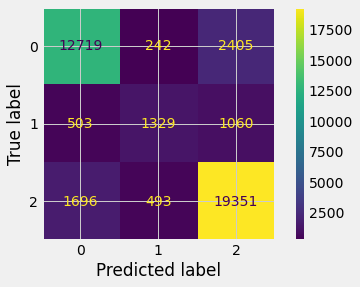

In [68]:
y_hat_train = pipe_knn.predict(X_train)
y_hat_test = pipe_knn.predict(X_test)

print('Evaluation Metrics: Train Data\n')
print(classification_report(y_train,y_hat_train))
print('---------------------------------------------\n')
print('Evaluation Metrics: Test Data\n')
print(classification_report(y_test,y_hat_test))

plot_confusion_matrix(pipe_knn,X_train,y_train)

In [158]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'knn__n_neighbors': [15],
    'knn__weights': ['distance'],
    'knn__leaf_size': [40],
    'knn__p': [1]
}

search = GridSearchCV(pipe_knn, param_grid, n_jobs=-1)
search.fit(X_train, y_train)

print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.780):
{'knn__leaf_size': 40, 'knn__n_neighbors': 15, 'knn__p': 1, 'knn__weights': 'distance'}


### Random Forest

In [69]:
from sklearn.ensemble import RandomForestClassifier

pipe_rf = Pipeline([('trsfm',clmntr),('rf',RandomForestClassifier())])
pipe_rf.fit(X_train,y_train)

Pipeline(steps=[('trsfm',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['basin', 'region', 'lga',
                                                   'scheme_management',
                                                   'extraction_type',
                                                   'extraction_type_group',
                                                   'extraction_type_class',
                                                   'management',
                                                   'management_group',
                                                   'payment', 'payment_type',
                                                   'water_quality',
                                                   'quality_group', 'quantity',
                

Evaluation Metrics: Train Data

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15366
           1       0.98      0.96      0.97      2892
           2       0.99      1.00      1.00     21540

    accuracy                           0.99     39798
   macro avg       0.99      0.99      0.99     39798
weighted avg       0.99      0.99      0.99     39798

---------------------------------------------

Evaluation Metrics: Test Data

              precision    recall  f1-score   support

           0       0.79      0.77      0.78      7458
           1       0.44      0.36      0.40      1425
           2       0.81      0.84      0.82     10719

    accuracy                           0.78     19602
   macro avg       0.68      0.66      0.67     19602
weighted avg       0.77      0.78      0.78     19602



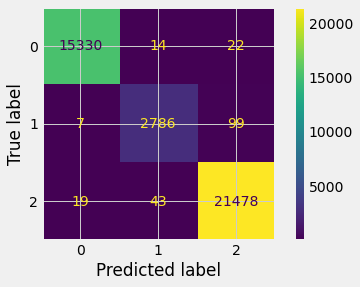

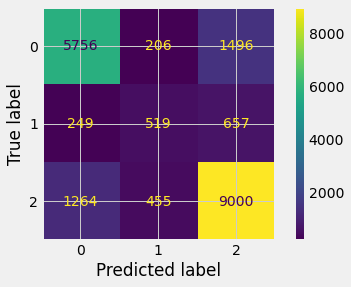

In [74]:
y_hat_train = pipe_rf.predict(X_train)
y_hat_test = pipe_rf.predict(X_test)

print('Evaluation Metrics: Train Data\n')
print(classification_report(y_train,y_hat_train))
print('---------------------------------------------\n')
print('Evaluation Metrics: Test Data\n')
print(classification_report(y_test,y_hat_test))

print(plot_confusion_matrix(pipe_rf,X_train,y_train))
print(plot_confusion_matrix(pipe_rf,X_test,y_test))

In [92]:
len(pipe_rf.steps[1][1].feature_importances_)

296

In [97]:
X_train.shape[1]

30

In [102]:
pipe_rf.steps[0][1].get_feature_names

<bound method ColumnTransformer.get_feature_names of ColumnTransformer(transformers=[('ohe',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['basin', 'region', 'lga', 'scheme_management',
                                  'extraction_type', 'extraction_type_group',
                                  'extraction_type_class', 'management',
                                  'management_group', 'payment', 'payment_type',
                                  'water_quality', 'quality_group', 'quantity',
                                  'quantity_group', 'source', 'source_type',
                                  'source_class', 'waterpoint_type',
                                  'waterpoint_type_group']),
                                ('ss', StandardScaler(),
                                 ['amount_tsh', 'longitude', 'latitude'])])>

In [150]:
feature_names = list(pipe_rf.named_steps['trsfm'].transformers_[0][1].get_feature_names())
feature_names

['x0_Internal',
 'x0_Lake Nyasa',
 'x0_Lake Rukwa',
 'x0_Lake Tanganyika',
 'x0_Lake Victoria',
 'x0_Pangani',
 'x0_Rufiji',
 'x0_Ruvuma / Southern Coast',
 'x0_Wami / Ruvu',
 'x1_Arusha',
 'x1_Dar es Salaam',
 'x1_Dodoma',
 'x1_Iringa',
 'x1_Kagera',
 'x1_Kigoma',
 'x1_Kilimanjaro',
 'x1_Lindi',
 'x1_Manyara',
 'x1_Mara',
 'x1_Mbeya',
 'x1_Morogoro',
 'x1_Mtwara',
 'x1_Mwanza',
 'x1_Pwani',
 'x1_Rukwa',
 'x1_Ruvuma',
 'x1_Shinyanga',
 'x1_Singida',
 'x1_Tabora',
 'x1_Tanga',
 'x2_Arusha Rural',
 'x2_Arusha Urban',
 'x2_Babati',
 'x2_Bagamoyo',
 'x2_Bahi',
 'x2_Bariadi',
 'x2_Biharamulo',
 'x2_Bukoba Rural',
 'x2_Bukoba Urban',
 'x2_Bukombe',
 'x2_Bunda',
 'x2_Chamwino',
 'x2_Chato',
 'x2_Chunya',
 'x2_Dodoma Urban',
 'x2_Geita',
 'x2_Hai',
 'x2_Hanang',
 'x2_Handeni',
 'x2_Igunga',
 'x2_Ilala',
 'x2_Ileje',
 'x2_Ilemela',
 'x2_Iramba',
 'x2_Iringa Rural',
 'x2_Kahama',
 'x2_Karagwe',
 'x2_Karatu',
 'x2_Kasulu',
 'x2_Kibaha',
 'x2_Kibondo',
 'x2_Kigoma Rural',
 'x2_Kigoma Urban',
 'x2_

In [151]:
feature_names = feature_names + pipe_rf.named_steps['trsfm'].transformers_[1][2]

In [160]:
feature_dict = dict(zip(feature_names,pipe_rf.steps[1][1].feature_importances_))
feature_dict

{'x0_Internal': 0.004249635294397986,
 'x0_Lake Nyasa': 0.0027006675779902667,
 'x0_Lake Rukwa': 0.00276265124011159,
 'x0_Lake Tanganyika': 0.0032138702283064247,
 'x0_Lake Victoria': 0.003730577308571516,
 'x0_Pangani': 0.003043854746350487,
 'x0_Rufiji': 0.003324321215998921,
 'x0_Ruvuma / Southern Coast': 0.002215141707225968,
 'x0_Wami / Ruvu': 0.00287164660712094,
 'x1_Arusha': 0.002239346601690887,
 'x1_Dar es Salaam': 0.0005817541987117494,
 'x1_Dodoma': 0.0022322772087926598,
 'x1_Iringa': 0.00396496982598268,
 'x1_Kagera': 0.0019320519782584796,
 'x1_Kigoma': 0.0023875825682809428,
 'x1_Kilimanjaro': 0.0020148279291503524,
 'x1_Lindi': 0.0012275008757971757,
 'x1_Manyara': 0.0015346004893997723,
 'x1_Mara': 0.0023092311859106507,
 'x1_Mbeya': 0.002014963564027262,
 'x1_Morogoro': 0.0022418028338343915,
 'x1_Mtwara': 0.0012941667682094468,
 'x1_Mwanza': 0.0017643838811666052,
 'x1_Pwani': 0.0018335196168522312,
 'x1_Rukwa': 0.001469163448772352,
 'x1_Ruvuma': 0.001338707038940

In [276]:
feature_dict_sorted = {k: v for k, v in sorted(feature_dict.items(), key=lambda item: item[1], reverse = True)}
feature_dict_sorted

{'latitude': 0.19762358578920278,
 'longitude': 0.1974708752213641,
 'x14_dry': 0.04449061415889316,
 'x13_dry': 0.041399769088296554,
 'amount_tsh': 0.02363068076768278,
 'x13_enough': 0.014270857118355506,
 'x19_other': 0.013866688248803636,
 'x6_other': 0.013259939728136258,
 'x18_other': 0.01320038670564103,
 'x5_other': 0.012350688957993024,
 'x14_enough': 0.011972225627735566,
 'x4_other': 0.008817552187157735,
 'x18_communal standpipe': 0.008598663446368527,
 'x18_communal standpipe multiple': 0.007655690610019734,
 'x13_insufficient': 0.007471528440585083,
 'x9_never pay': 0.007351904211051356,
 'x10_never pay': 0.007172302077616545,
 'x14_insufficient': 0.007126987671125475,
 'x7_vwc': 0.006427739977193462,
 'x3_VWC': 0.0064111311988302305,
 'x12_good': 0.0044364470013929375,
 'x6_handpump': 0.004373848758837459,
 'x0_Internal': 0.004249635294397986,
 'x9_pay per bucket': 0.004216990799518002,
 'x11_soft': 0.004016617884841434,
 'x1_Iringa': 0.00396496982598268,
 'x6_gravity':

In [277]:
names = list(feature_dict_sorted.keys())[:9]
vals = list(feature_dict_sorted.values())[:9]

<BarContainer object of 9 artists>

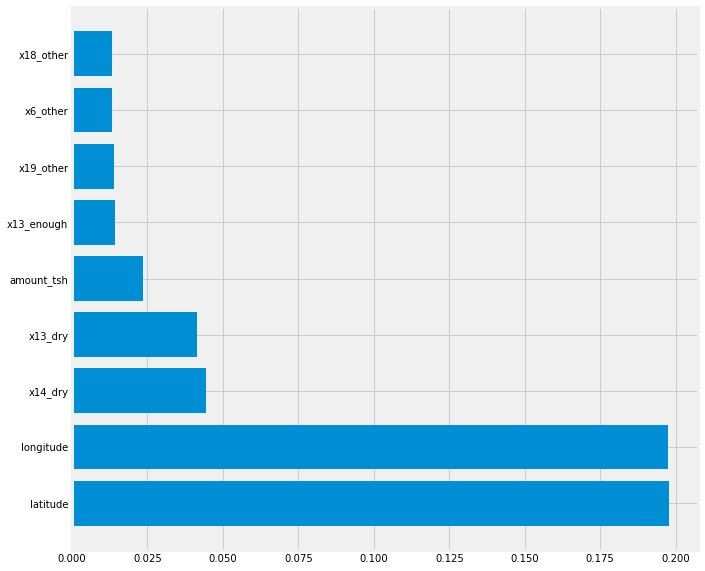

In [278]:
import matplotlib.pyplot as plt

plt.subplots(figsize = (10,10))
plt.barh(names, vals)

In [168]:
def plot_feature_importances(model):
    n_features = feature_names
    plt.figure(figsize=(8,8))
    plt.barh(feature_dict_sorted, align='center') 
    #plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(pipe_rf.steps[1][1])

TypeError: barh() missing 1 required positional argument: 'width'

<Figure size 576x576 with 0 Axes>

In [75]:
plot_feature_importances(y_hat_test)

NameError: name 'plot_feature_importances' is not defined

In [ ]:
param_grid = {
    'rf__n_neighbors': [15],
    'rf__weights': ['distance'],
    'rf__leaf_size': [40],
    'rf__p': [1]
}

search = GridSearchCV(pipe_rf, param_grid, n_jobs=-1)
search.fit(X_train, y_train)

print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

### Bagging Classifier

In [71]:
from sklearn.ensemble import BaggingClassifier

pipe_bag = Pipeline([('trsfm',clmntr),('bag',BaggingClassifier())])#
pipe_bag.fit(X_train,y_train)

Pipeline(steps=[('trsfm',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['basin', 'region', 'lga',
                                                   'scheme_management',
                                                   'extraction_type',
                                                   'extraction_type_group',
                                                   'extraction_type_class',
                                                   'management',
                                                   'management_group',
                                                   'payment', 'payment_type',
                                                   'water_quality',
                                                   'quality_group', 'quantity',
                

Evaluation Metrics: Train Data

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     15366
           1       0.95      0.92      0.94      2892
           2       0.98      0.98      0.98     21540

    accuracy                           0.98     39798
   macro avg       0.97      0.96      0.97     39798
weighted avg       0.98      0.98      0.98     39798

---------------------------------------------

Evaluation Metrics: Test Data

              precision    recall  f1-score   support

           0       0.77      0.78      0.78      7458
           1       0.42      0.39      0.40      1425
           2       0.81      0.82      0.82     10719

    accuracy                           0.77     19602
   macro avg       0.67      0.66      0.67     19602
weighted avg       0.77      0.77      0.77     19602



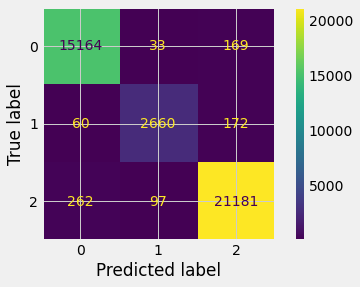

In [72]:
y_hat_train = pipe_bag.predict(X_train)
y_hat_test = pipe_bag.predict(X_test)

print('Evaluation Metrics: Train Data\n')
print(classification_report(y_train,y_hat_train))
print('---------------------------------------------\n')
print('Evaluation Metrics: Test Data\n')
print(classification_report(y_test,y_hat_test))

plot_confusion_matrix(pipe_bag,X_train,y_train)

In [ ]:
param_grid = {
    'rf__n_neighbors': [15],
    'rf__weights': ['distance'],
    'rf__leaf_size': [40],
    'rf__p': [1]
}

search = GridSearchCV(pipe_bag, param_grid, n_jobs=-1)
search.fit(X_train, y_train)

print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

### Gradient Boosting

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_validate


clfs = []
clfs.append(DecisionTreeClassifier())
clfs.append(RandomForestClassifier(n_jobs = 8))
clfs.append(GradientBoostingClassifier())

for classifier in clfs:
    pipeline.set_params(clf = classifier)
    scores = cross_validate(pipeline, X_train, y_train)
    print('---------------------------------')
    print(str(classifier))
    print('-----------------------------------')
    for key, values in scores.items():
            print(key,' mean ', values.mean())
            print(key,' std ', values.std())

NameError: name 'pipeline' is not defined

In [ ]:
# Plot Distribution of Residuals
fig6, ax = plt.subplots()

sqft_mod1_residuals = sqft_mod1.resid
sns.histplot(sqft_mod1_residuals).set_title("Distribution of Residuals")
plt.tight_layout()
fig6.savefig('images/model_1_residuals.png');

In [ ]:
# QQ-Plots
fig7 = sm.graphics.qqplot(sqft_mod1_residuals, dist=stats.norm, line='45', fit=True)
plt.tight_layout()
fig7.savefig('images/model_1_qq.png');

In [ ]:
# Residuals vs fitted Plot

# model values
model1_fitted_y = sqft_mod1.fittedvalues
# model residuals
model1_residuals = sqft_mod1.resid


plot_lm_1 = sns.residplot(model1_fitted_y, model1_residuals, data=df,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.set_title('Residuals vs Fitted')
plot_lm_1.set_xlabel('Fitted values')
plot_lm_1.set_ylabel('Residuals')
plt.tight_layout()
plt.savefig('images/model_1_homoskedasticity.png');

In [ ]:
# define the continuous and categorical variables in seperate lists
continuous = None
categorical = None

In [ ]:
# Use StandardScalar to scale continuous variables
continuous = ['price','sqft_living','sqft_above','sqft_living15','sqft_lot15']
data_log_scaled = preprocessing.log_scaled(data=df,features=continuous)

#### One-hot encoding the categorical variables with more than two categories. 

In [ ]:
# OneHotEncode all categorical variables
categoricals = ['season']
data_ohe = preprocessing.ohe_categoricals(data=df,features=categoricals)

In [ ]:
# Concatonate the continuous and categorical variables.
data_pp = pd.concat([data_log_scaled,data_ohe, df[['waterfront', 'has_bsmt', 'renovated', 'bedrooms', 'bathrooms', 'condition','floors','grade', 'view', 'north_south', 'age']]],axis=1)

In [ ]:
formula = 'log_price ~ log_sqft_living'
sqft_mod2 = ols(formula, data_pp).fit()
sqft_mod2_summ = sqft_mod2.summary()
sqft_mod2_summ

GIven the R squared value of .455 and the P_value of 0 for the log_sqft_living, we can say that the square feet of the house is statistically significant in determining the price of a home. 

In [ ]:
lr_model1 = LinearRegression()
lr_model1.fit(data_pp[['log_sqft_living']], data_pp['log_price'])
lr_model1.score(data_pp[['log_sqft_living']], data_pp['log_price'])

Using sklearn above to double chek our R squared, we get the same R squared.

In [ ]:
#Check for Multicolinearity
sns.set_theme(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
fig10, ax = plt.subplots(figsize=(15, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap,vmin=-1, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .9}, annot = True, fmt = '0.1g')
ax.set_title('Multicollinearity',fontweight="bold", size=20)
plt.savefig('images/model_2_multicollinearity.png');

There looks to be a number of variables that are highly correlated with eachother. Lets look a the pairs of variables that are highly correlated.

In [ ]:
#Lets look at the pairs of variables that are highly correlated

dfcorr = df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

dfcorr['pairs'] = list(zip(dfcorr.level_0, dfcorr.level_1))

dfcorr.set_index(['pairs'], inplace = True)

dfcorr.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
dfcorr.columns = ['cc']

dfcorr.drop_duplicates(inplace=True)

dfcorr[(dfcorr.cc>.75) & (dfcorr.cc<1)]

It looks like sqft_living is highly correlated with a number of variables.

- We will look to remove sqft_above from our next model because of its high correlation with sqft_living. Most home do not have a basement, so the sqft_above is close to the same as sqft_living. 

- We will also look to remove sqft_living15 from our next model. It is also highly coorelated. 

- north_south was created from the lat column, so we will remove lat from the model.

In [ ]:
#Get the model coefficients
mult_model2_coeff = dict(zip(mult_model2.params.index,abs(mult_model2.params.values)))
mult_model2_coeff = {k: v for k, v in sorted(mult_model2_coeff.items(), key=lambda item: item[1])}

In [ ]:
#Create a dictionary that will show each coefficient for each variable
def calculate_percentage(df_dict):
    percents = []
    for k,v in df_dict.items():
        if k.startswith('log_'):
            percent = ((1.1)**v - 1)*100
        else:
            percent = (np.exp(v) - 1)*100
        percents.append(percent)
    return percents
mult_model2_coeff = dict(zip(mult_model2.params.index,abs(mult_model2.params.values)))
mult_model2_coeff = {k: v for k, v in sorted(mult_model2_coeff.items(), key=lambda item: item[1])}
percentages = calculate_percentage(mult_model2_coeff)
percentages_dict = dict(zip(mult_model2_coeff.keys(),percentages))
percentages_dict

This is the final model we will use in our presentation because we are not violating model assumptions and we have a good set of variables with low p values. Below are some interpretations of the most significant features: 


 - north_south: The expected percent increase in mean price from living in the south to living in the north is 137%
 - Waterfront: The expected percent increase in mean price from not having waterfront to having waterfront is 134%
 - Renovated: The expected percent increase in mean price from not having a renovated home to having a renovated home is 19%
 - Square foot: for every 10% increase in square footage, the price of the home will increase by 3.6% 
 - Grade: The expected percent increase in mean price from increasing the grade on your house by one level is 41%
 - Condition: The expected percent increase in the mean price from increasing the condition score by one level is 11%
 - Age: For every year older the home is, the value will decrease by .4%
 - Season: There is an 8.5% increase in the average price of the house in the Autumn season as opposed to any other season. 

In [ ]:
#Create a bar chart that shows the most significant features
mpl.style.use('fivethirtyeight')
# Display the most significant features
mult_model2_coeff = dict(zip(x_cols2,abs(mult_model2.params[1:])))
mult_model2_coeff = {k: v for k, v in sorted(mult_model2_coeff.items(), key=lambda item: item[1], reverse = True)}
#plt.barh(list(mult_model2_coeff.keys()),list(mult_model2_coeff.values()))

fig4, ax = plt.subplots(figsize = (8,8))

#Create bar plot
sns.barplot(y=list(mult_model2_coeff.keys()),x=list(mult_model2_coeff.values()), color = 'g')

ax.set_ylabel("Feature")
ax.set_xlabel("Model Coefficient")
ax.set_title('Linear Regression Model Features')
plt.tight_layout()
#Save
plt.savefig('images/model_features.png');


# Conclusions

**1. Best to sell homes from the northern side of King County, and waterfront homes.** Our analysis shows that as you move north in King County, homes tend to sell for a higher price. The prices also increase as you get closer to the big cities and closer to the waterfront.

**2. Recommend clients to renovate to increase property value.** Our analysis shows that renovated homes sell for a higher price than those homes not renovated. Our models show that renovating to increase square footage increases the sale price and consider adding extra bathrooms in the renovation as that also increases the price. Also consider improving the view of the home when renovating.

**3. Consider selling in the late spring, early summer.** The most homes wre sold in May for both years of our data. Homes tend to increase in sales during the spring and tend decrease slightly in the winter months.  

# Next Steps

Further analyses could provide even more insight into how you will advise your clients to buy or sell thier home. 

**Better idea of features of a home** Other features that indacate home sale include the color of the home, number of windows, garage indicator, size of garage, pool indicator, size of lawn, full property size, flood indicater, style of the home, among others.

**Better idea of neighborhood and surrounding neighborhoods.** We could gather more qualitative data on surrounding neighborhoods such as neighborhood safety, population demographics, and other idicators that may predict the price of a home. You could get an idea of proximity to schools, grocery stores, the city.

**Better idea of surrounding counties in Washington.** We could gather data from other counties and compare, county to county, how sale prices fluctuate. Other macro indicators of county could be political climate, social programs, broader proxiimity to major highways. 

**Better idea of sale history.** We had a fairly good sample of two years worth of data, but it would be good to gather even more years of sales data in King County further solidify reccomendations. There may be features of the home that are better at predicting sale price now then they were 5 or 10 years ago. 